In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip


In [149]:
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils, print_summary
from keras.models import Sequential

In [150]:
def load_images(fileName, num_images):
# f = gzip.open('C:/Users/vivek/Desktop/Alphabet_recognition/emnist-letters-train-images-idx3-ubyte.gz','r')
    f = gzip.open(fileName,'r')
    image_size = 28
    num_images = num_images
    f.read(16)
    buf = f.read(image_size * image_size * num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# print(data.shape)
#     data = data.reshape(num_images, image_size, image_size, 1)
    return data

In [151]:
def load_images_labels(fileName, num_images):
# f = gzip.open('C:/Users/vivek/Desktop/Alphabet_recognition/emnist-letters-train-images-idx3-ubyte.gz','r')
    f = gzip.open(fileName,'r')
    image_size = 28
    num_images = num_images
    f.read(8)
    buf = f.read(num_images)
    data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# print(data.shape)
#     data = data.reshape(num_images, image_size, image_size, 1)
    return data

In [152]:
train_x = load_images('C:/Users/vivek/Desktop/Alphabet_recognition/emnist-letters-train-images-idx3-ubyte.gz', 60000)
test_x = load_images('C:/Users/vivek/Desktop/Alphabet_recognition/emnist-letters-test-images-idx3-ubyte.gz', 10000)
train_y = load_images_labels('C:/Users/vivek/Desktop/Alphabet_recognition/emnist-letters-train-labels-idx1-ubyte.gz', 60000)
test_y = load_images_labels('C:/Users/vivek/Desktop/Alphabet_recognition/emnist-letters-test-labels-idx1-ubyte.gz', 10000)

In [153]:
no_of_classes = 27

In [154]:
Train_X = train_x.reshape(60000,28,28,1)
Test_X = test_x.reshape(10000, 28,28,1)
Train_Y = np_utils.to_categorical(train_y, num_classes = no_of_classes)
Test_Y = np_utils.to_categorical(test_y, num_classes = no_of_classes)

In [155]:
Train_Y[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [156]:
no_of_classes = len(Train_Y[0])

In [157]:
print(no_of_classes)

27


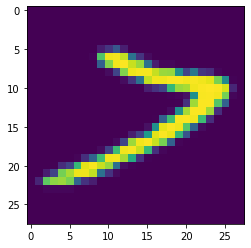

In [158]:
image = np.asarray(Train_X[8]).squeeze()
plt.imshow(image)
plt.show()

In [159]:
model= Sequential()


In [160]:
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
# model.add(Conv2D(64,(5,5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(no_of_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_9 (Dense)              (None, 27)               

In [161]:
model.fit(Train_X, Train_Y,
         batch_size=64,
         validation_data = (Test_X, Test_Y),
         epochs=50)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 83us/step - loss: 1.0039 - accuracy: 0.7693 - val_loss: 0.4754 - val_accuracy: 0.8512
Epoch 2/50
60000/60000 [==============================] - 5s 80us/step - loss: 0.3237 - accuracy: 0.8946 - val_loss: 0.3719 - val_accuracy: 0.8760
Epoch 3/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.2576 - accuracy: 0.9132 - val_loss: 0.3407 - val_accuracy: 0.8854
Epoch 4/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2270 - accuracy: 0.9216 - val_loss: 0.3395 - val_accuracy: 0.8872
Epoch 5/50
60000/60000 [==============================] - 5s 78us/step - loss: 0.2014 - accuracy: 0.9298 - val_loss: 0.3835 - val_accuracy: 0.8758
Epoch 6/50
60000/60000 [==============================] - 5s 79us/step - loss: 0.1844 - accuracy: 0.9353 - val_loss: 0.3738 - val_accuracy: 0.8859
Epoch 7/50
60000/60000 [==============================] - 5s 79us/st

In [162]:
fer_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(fer_json)
model.save_weights('weights.h5')